<!--COURSE_INFORMATION-->
*This notebook contains material from [ND Pyomo Cookbook](http://jckantor.github.io/ND-Pyomo-Cookbook/) by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/ND-Pyomo-Cookbook).*
*The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Simulation](05.00-Simulation.ipynb) | [Contents](index.ipynb) | [Exothermic CSTR](05.02-Exothermic-CSTR.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.01-Linear-First-Order-System.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Linear First Order System

This notebook demonstrates simulation of a linear first-order system in Pyomo using two distinct approaches. The first uses the `Simulator` class from Pyomo which can employ the 

In [0]:
%%capture
!pip install -q pyomo

## First-Order Differential Equation with Initial Condition

The following cell implements a solution to a first-order linear model in the form

\begin{align}
\tau\frac{dy}{dt} + y & = K u(t) \\
\end{align}

where $\tau$ and $K$ are model parameters, and $u(t)$ is an external process input.

Text(0.5,1,'Response of a linear first-order ODE')

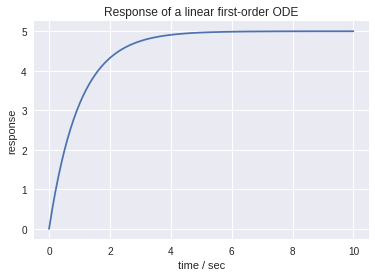

In [2]:
% matplotlib inline
from pyomo.environ import *
from pyomo.dae import *
import matplotlib.pyplot as plt

tf = 10
tau = 1
K = 5

# define u(t)
u = lambda t: 1

# create a model object
model = ConcreteModel()

# define the independent variable
model.t = ContinuousSet(bounds=(0, tf))

# define the dependent variables
model.y = Var(model.t)
model.dydt = DerivativeVar(model.y)

# fix the initial value of y
model.y[0].fix(0)

# define the differential equation as a constraint
model.ode = Constraint(model.t, rule=lambda model, t: tau*model.dydt[t] + model.y[t] == K*u(t))

# transform dae model to discrete optimization problem
#TransformationFactory('dae.finite_difference').apply_to(model, nfe=50, method='BACKWARD')

# solve the model
#SolverFactory('ipopt').solve(model).write()

tsim, profiles = Simulator(model, package='scipy').simulate(numpoints=100)

plt.plot(tsim, profiles)

# access elements of a ContinuousSet object
t = [t for t in model.t]

# access elements of a Var object
y = [model.y[t]() for t in model.y]

plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('response')
plt.title('Response of a linear first-order ODE')

<!--NAVIGATION-->
< [Simulation](05.00-Simulation.ipynb) | [Contents](index.ipynb) | [Exothermic CSTR](05.02-Exothermic-CSTR.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.01-Linear-First-Order-System.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
